# Desafio de projeto: COVID-19

Desafio de projeto elaborado para a plataforma Digital Inovation One, onde é simulado o início do desenvolvimento do trabalho de um cientista de dados.

- Índice

1. Importando dados e bibliotecas
2. Tratamento dos dados
    1. Renomeando colunas
    2. Separando os dados
3. Visualizando os dados
    1. Montando um gráfico do aumento de caso por dia
    2. Quantos casos novos por dia?
    3. Quantas mortes aumenta por dia?

## 1. Importando dados e bibliotecas

Aqui realizamos os *imports* e lemos o dado que vamos analisar, que no caso é o *dataset* do COVID-19.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as pgo
import seaborn as sns

In [3]:
# aqui já realizamos a importação do dataset com as colunas de datas formatas me datetime

df = pd.read_csv("covid_19_data.csv", parse_dates=['ObservationDate', 'Last Update'])

df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [4]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

## 2. Tratamento dos Dados

Nesta seção iremos realizar alguns tratamentos dos dados, onde nos trará melhores resultados em nossas análises e nos possibilitará visualizar mais facilmente os dados.

### 2.1. Renomeando colunas

Por convenção, iremos renomear colunas e dar nomes que não nos darão possíveis erros. Nomes de colunas com espaços, letras maiúsculas ou caracteres especiais, podem nos trazer problemas, então iremos tratar essas informações para evitar tempo para buscar soluções de demais problemas.

In [5]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
df = df.rename({"SNo": "sno", "ObservationDate": "data_observacao", "Province/State": "provincia_estado",
            "Country/Region": "pais_regiao", "Last Update": "ultimo_update", "Confirmed": "confirmado", "Deaths": "mortes",
            "Recovered": "recuperado"}, axis=1)

### 2.2. Separando os dados

Nesta seção iremos realizar a separação dos dados que queremos utilizar e analisar. Selecionando somente o Brasil. Então iremos manipular o dataframe *df*, para que ele nos dê somente os dados do Brasil, e assim poderemos realizar as nossas análises e predições.

In [7]:
df["pais_regiao"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [27]:
# loc -> realiza um "corte" no dataframe original
# no caso, pega somente os dados do pais Brazil e que tem casos confirmados maior que 0
# os dados estavam meio quebrado no meio, então recortei somente a parte mais recente dos dados

df_brasil = df.loc[(df["pais_regiao"] == 'Brazil') & (df["confirmado"] > 0) & (df["data_observacao"] < '2020-05-20')]

## 3. Visualizando os dados

Agora com os dados que queremos em mãos, vamos começar a visualizar e analisá-los para entender algumas movimentações existentes neles.

In [31]:
df_brasil

,sno,data_observacao,provincia_estado,pais_regiao,ultimo_update,confirmado,mortes,recuperado
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2981,2982,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
25194,25195,2020-05-15,NaN,Brazil,2021-04-02 15:13:53,220291.0,14962.0,84970.0
25575,25576,2020-05-16,NaN,Brazil,2021-04-02 15:13:53,233511.0,15662.0,89672.0
25956,25957,2020-05-17,NaN,Brazil,2021-04-02 15:13:53,241080.0,16118.0,94122.0
26337,26338,2020-05-18,NaN,Brazil,2021-04-02 15:13:53,255368.0,16853.0,100459.0


### 3.1. Gráfico

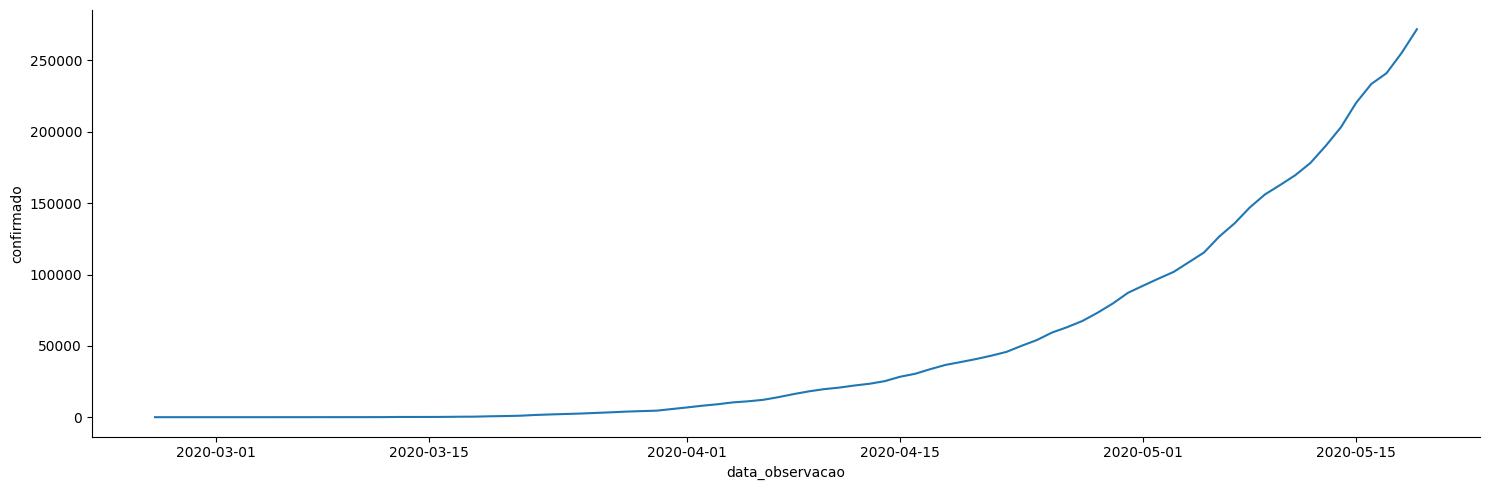

In [39]:
sns.relplot(data=df_brasil, x='data_observacao', y='confirmado', kind='line', errorbar=None, aspect=3)

### 3.2. 

Criar nova coluna com o aumento de dados por dia

In [32]:
df_brasil['novos_casos'] = list(map(lambda x: 0 if(x == 0) else df_brasil['confirmado'].iloc[x] - df_brasil['confirmado'].iloc[x - 1], np.arange(df_brasil.shape[0])))

/tmp/ipykernel_11635/1208397375.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df_brasil

,sno,data_observacao,provincia_estado,pais_regiao,ultimo_update,confirmado,mortes,recuperado,novos_casos
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2981,2982,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
25194,25195,2020-05-15,NaN,Brazil,2021-04-02 15:13:53,220291.0,14962.0,84970.0,17126.0
25575,25576,2020-05-16,NaN,Brazil,2021-04-02 15:13:53,233511.0,15662.0,89672.0,13220.0
25956,25957,2020-05-17,NaN,Brazil,2021-04-02 15:13:53,241080.0,16118.0,94122.0,7569.0
26337,26338,2020-05-18,NaN,Brazil,2021-04-02 15:13:53,255368.0,16853.0,100459.0,14288.0


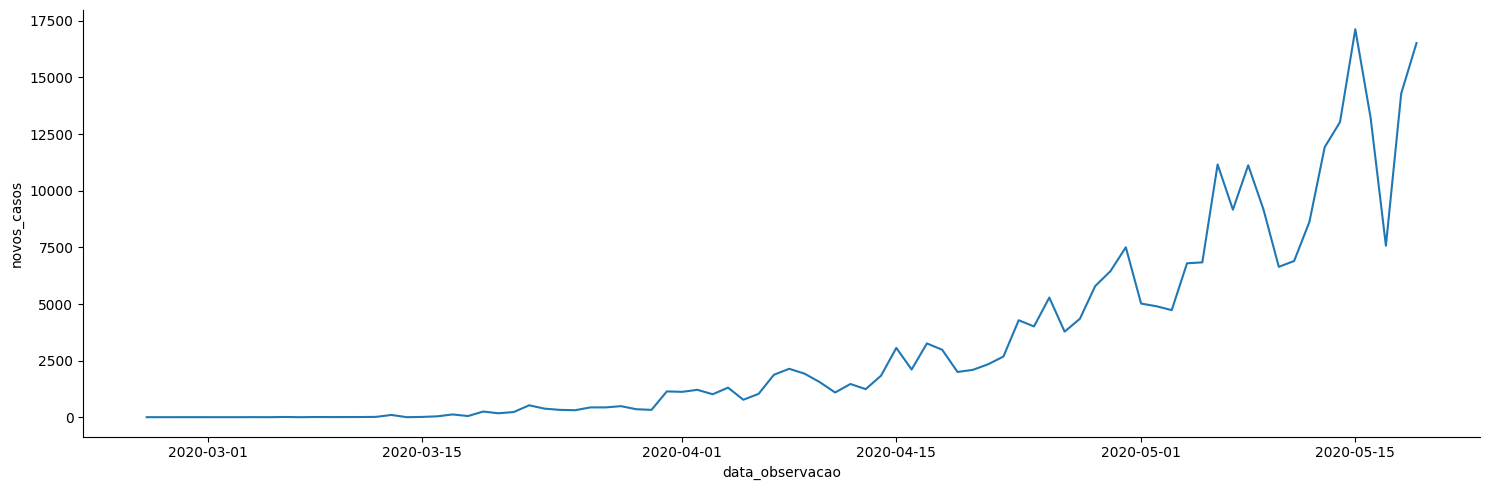

In [38]:
sns.relplot(data=df_brasil, x="data_observacao", y="novos_casos", kind="line", aspect=3)

## 3.3. Qual a evolução dos mortos?

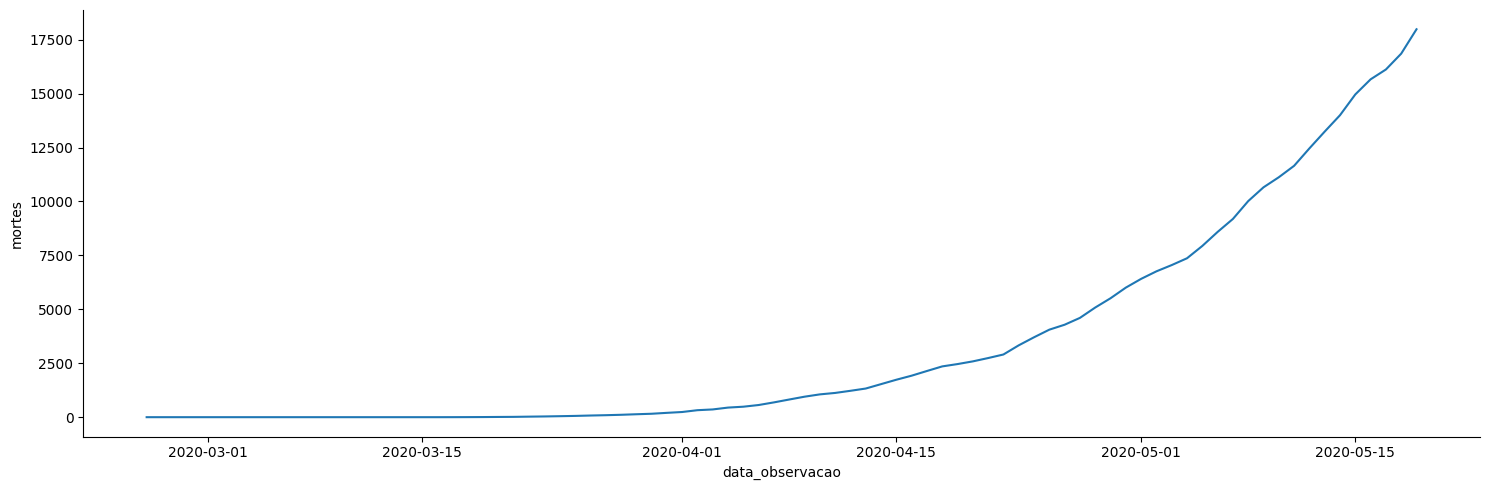

In [40]:
sns.relplot(data=df_brasil, x="data_observacao", y="mortes", kind="line", aspect=3)

## 3.3 Qual a taxa de crescimento médio da covid?